<a href="https://colab.research.google.com/github/pralineso/estudos_ds/blob/main/Aula_ocean_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link competição kaggle: https://www.kaggle.com/c/jornada-python-ocean

Objetivo: prever quais clientes tem mais chance de comprar capitalização

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
arquivo_test = 'https://raw.githubusercontent.com/feulo-ocean/ciencia_de_dados/master/test.csv'
arquivo_train = 'https://raw.githubusercontent.com/feulo-ocean/ciencia_de_dados/master/train.csv'
arquivo_sample = 'https://raw.githubusercontent.com/feulo-ocean/ciencia_de_dados/master/sample.csv'

test = pd.read_csv(arquivo_test)
train = pd.read_csv(arquivo_train)

#arquivo_train = 'https://raw.githubusercontent.com/feulo-ocean/ciencia_de_dados/master/train.csv'

#df = pd.read_csv(arquivo_train)



In [26]:

train = pd.read_csv(arquivo_train, index_col='id')


## Análise exploratória

In [4]:
train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             36773 non-null  object 
 2   marital         37000 non-null  object 
 3   education       35505 non-null  object 
 4   default         29296 non-null  object 
 5   housing         36176 non-null  object 
 6   loan            36176 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [18]:
train.isnull().sum()

id                   0
age                  0
job                296
marital             69
education         1564
default           7773
housing            893
loan               893
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [20]:
train.describe()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,18534.000000,40.023497,258.185492,2.566862,962.058189,0.173946,0.082222,93.576416,-40.505555,3.620484,5166.966047
std,10701.042901,10.412653,259.579105,2.765626,187.939691,0.497441,1.571009,0.578585,4.623600,1.735310,72.360902
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,9267.000000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,18534.000000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,27801.000000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,37068.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [41]:
train.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,36773,37000,35505,29296,36176,36176,37069,37069,37069,37069,37069
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9364,22424,10967,29293,19432,30518,23515,12424,7735,31989,32893


In [24]:
train['contact'].value_counts()

cellular     23515
telephone    13554
Name: contact, dtype: int64

In [33]:
train['job'].value_counts()

admin.           9364
blue-collar      8374
technician       6066
services         3565
management       2646
retired          1536
entrepreneur     1311
self-employed    1258
housemaid         944
unemployed        905
student           804
Name: job, dtype: int64

In [40]:
train['y'].value_counts()

no     32893
yes     4176
Name: y, dtype: int64

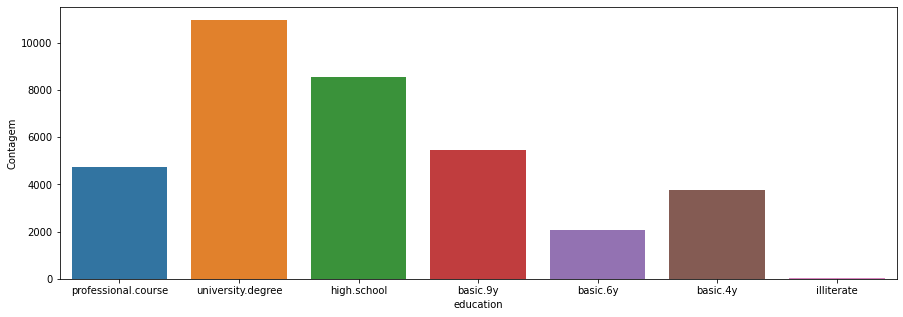

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='education')
plt.ylabel('Contagem')
plt.show()

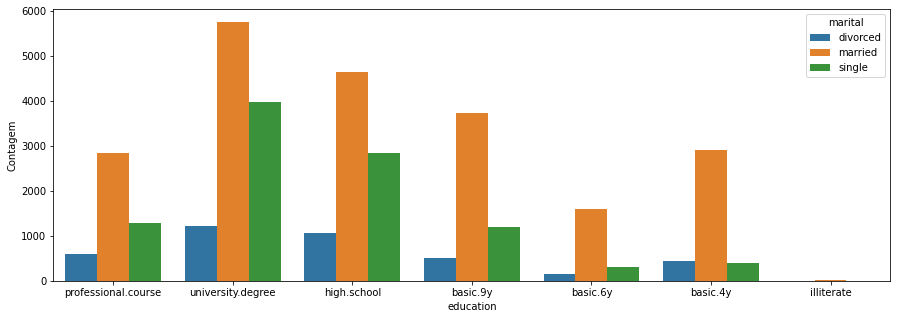

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='education', hue='marital')
plt.ylabel('Contagem')
plt.show()

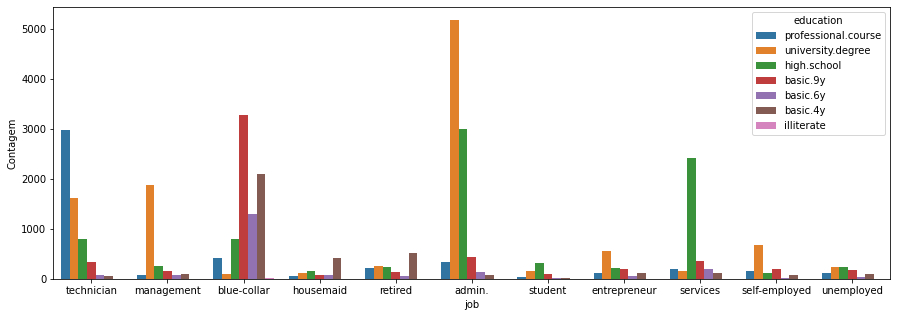

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='job', hue='education')
plt.ylabel('Contagem')
plt.show()

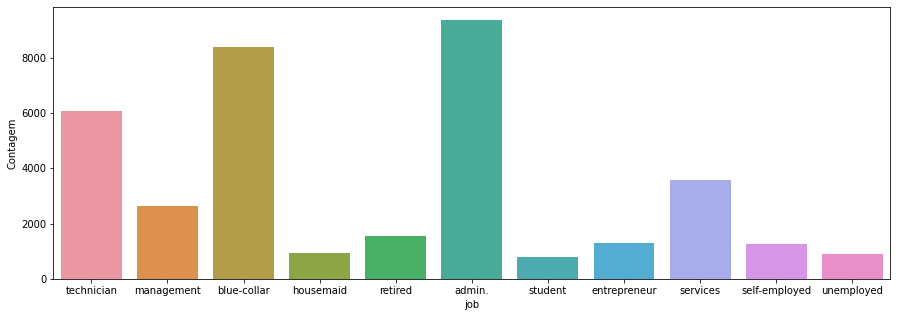

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='job')
plt.ylabel('Contagem')
plt.show()


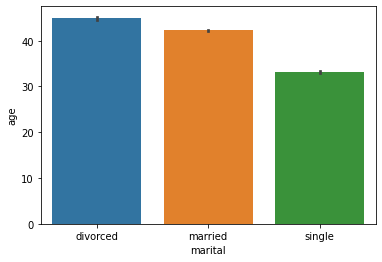

In [59]:
sns.barplot(data=train, x='marital', y='age')
plt.show()

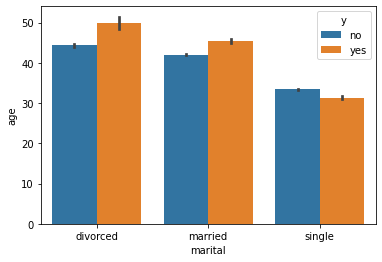

In [66]:
sns.barplot(data=train, x='marital', y='age', hue='y')

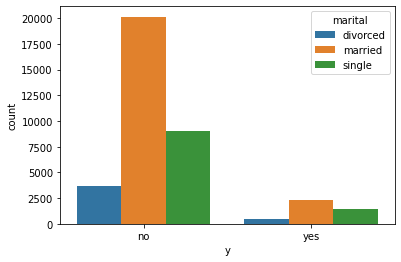

In [50]:
sns.countplot(data=train, x='y', hue='marital')

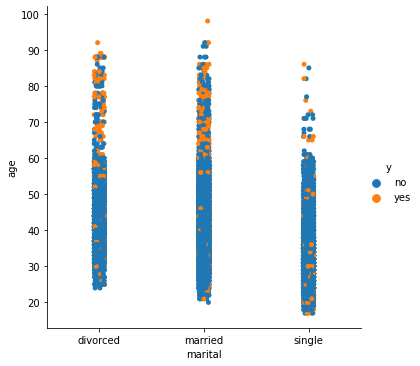

In [75]:
sns.figsize=(15,5)
sns.catplot(data=train, x='marital', y='age', hue='y', jitter=0.05)
plt.show()

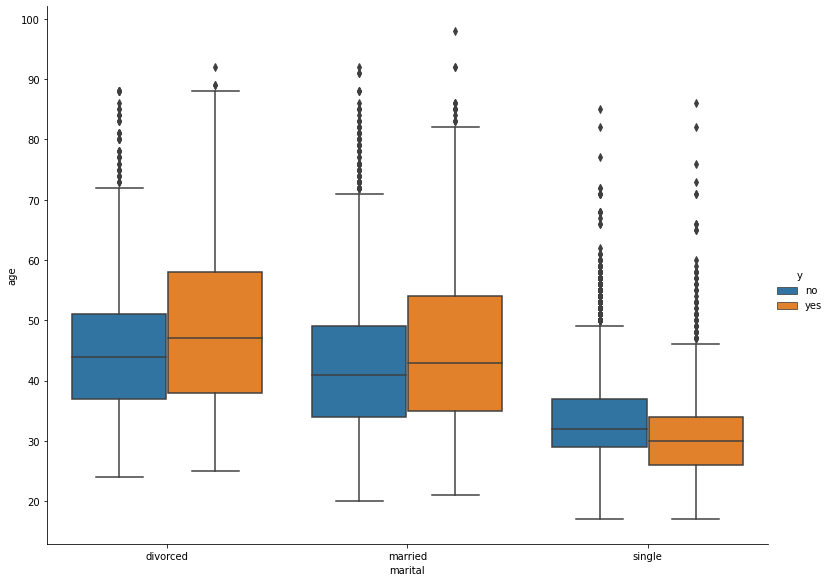

In [77]:
sns.figsize=(15,5)
sns.catplot(data=train, x='marital', y='age', hue='y', kind='box', aspect=8/6, height=8)
plt.show()

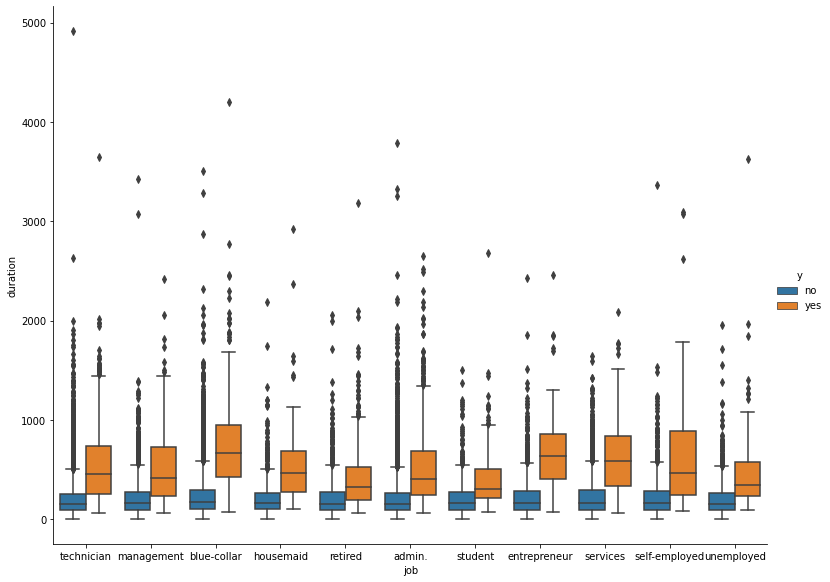

In [81]:
sns.figsize=(15,5)
sns.catplot(data=train, x='job', y='duration', hue='y', kind='box', aspect=8/6, height=8)
plt.show()

#bom tirar todo mundo que teve tempo 0 pra ver melhor esse grafico

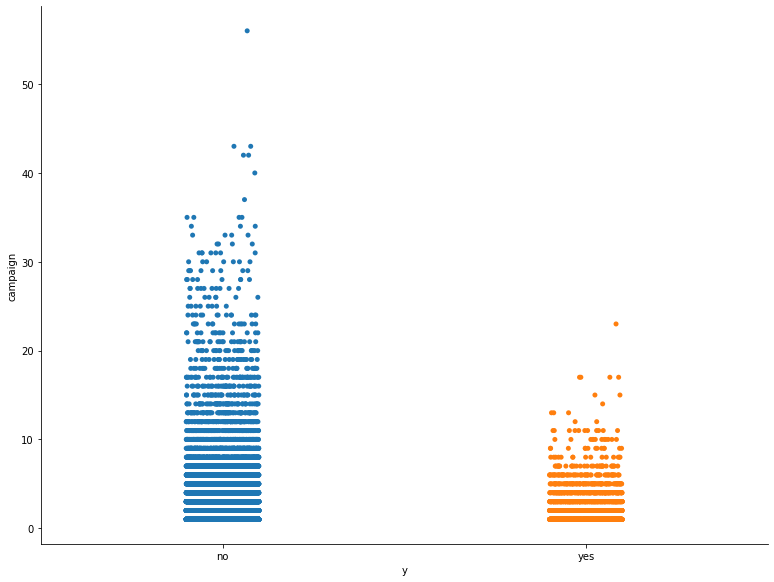

In [92]:
sns.figsize=(15,5)
sns.catplot(data=train, x='y', y='campaign', aspect=8/6, height=8)
plt.show()

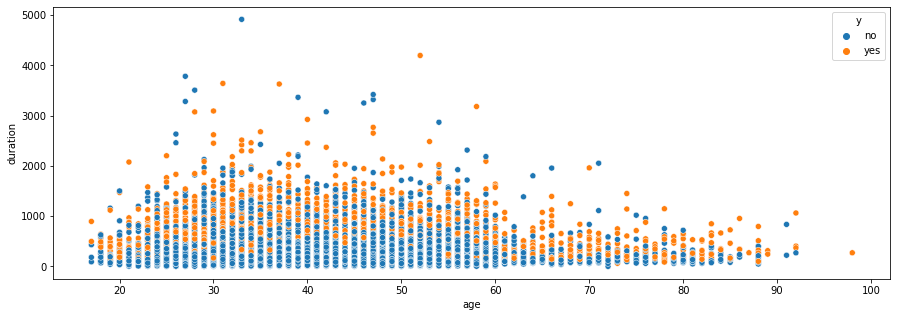

In [80]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='age', y='duration', data=train, hue='y')
plt.show()

In [85]:
train[train.duration <= 60].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000
mean,39.589030,35.317130,4.420068,992.553678,0.108916,0.215467,93.628884,-41.485573,3.726651,5175.361476
std,9.424706,16.722764,5.234719,79.716686,0.343336,1.433616,0.573790,3.924971,1.662299,66.170215
min,19.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,20.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-46.200000,1.354000,5099.100000
50%,38.000000,37.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-42.000000,4.858000,5195.800000
75%,47.000000,51.000000,5.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,88.000000,60.000000,43.000000,999.000000,4.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [89]:
train[train.y == 'yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,40.902299,551.579502,2.055316,790.203305,0.494732,-1.220690,93.361787,-39.819397,2.131688,5095.297031
std,13.831597,400.507671,1.667744,404.722734,0.863898,1.621333,0.675989,6.101435,1.745427,87.923517
min,17.000000,63.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,252.750000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.853250,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.503500,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#fazer um catplot com x='y' e y='campaign'


In [ ]:
#objetivo: prever quais clientes tem mais chance de comprar capitalização
#se a pessoa compra ou nao
#problema é de classificação - porque a variavel quea gente qr prever é uma categoria
#regressao - quadno a saida da previsao são numeros

## Modelagem

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#usar codificacao one hot na variavel job

In [7]:
# codificação One-hot
pd.get_dummies(train, columns=['job'])

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,52,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no,0,0,0,0,0,0,0,0,0,1,0
1,36,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,0,0,0,0,1,0,0,0,0,0,0
2,53,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,1,0,0,0,0,0,0,0,0,0
3,45,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no,0,1,0,0,0,0,0,0,0,0,0
4,60,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,28,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,-1.7,94.215,-40.3,0.876,4991.6,no,0,0,0,0,0,0,0,1,0,0,0
37065,52,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no,0,0,0,0,0,0,0,0,0,1,0
37066,54,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,1,0,0,0,0,0,0,0,0,0,0


In [16]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             37069 non-null  int64   
 1   job             36773 non-null  category
 2   marital         37000 non-null  category
 3   education       35505 non-null  category
 4   default         29296 non-null  category
 5   housing         36176 non-null  category
 6   loan            36176 non-null  category
 7   contact         37069 non-null  category
 8   month           37069 non-null  category
 9   day_of_week     37069 non-null  category
 10  duration        37069 non-null  int64   
 11  campaign        37069 non-null  int64   
 12  pdays           37069 non-null  int64   
 13  previous        37069 non-null  int64   
 14  poutcome        37069 non-null  category
 15  emp.var.rate    37069 non-null  float64 
 16  cons.price.idx  37069 non-null  float64 
 17  cons.conf.id

In [27]:
#Transforma as objct em category
for c in train.columns[train.dtypes == object]: # df.dtypes == 'object'
    train[c] = train[c].astype('category')


In [28]:
#reordenando
train.education = train.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True)

#ou

#train.education = train.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
#       'professional.course', 'university.degree'], ordered=True, inplace=True)

In [29]:
train.education.cat.categories

Index(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
       'professional.course', 'university.degree'],
      dtype='object')

In [30]:
train.job.cat.categories

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed'],
      dtype='object')

In [34]:
#Transforma as categorias em números
for c in train.columns[train.dtypes == 'category']:
  train[c] = train[c].cat.codes

In [35]:
train.job

id
0        9
1        4
2        1
3        1
4        3
        ..
37064    7
37065    9
37066    0
37067    0
37068    0
Name: job, Length: 37069, dtype: int8

In [36]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,4,1,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0
1,36,4,1,6,0,1,0,0,7,3,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
2,53,1,1,4,0,1,1,0,3,1,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
3,45,1,2,3,0,1,0,0,1,4,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2,0
4,60,3,1,4,-1,1,0,1,6,4,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0


In [37]:
y = train.y
X = train.drop('y', axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((31508, 20), (5561, 20), (31508,), (5561,))

In [40]:
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.11266979814650248, 0.11256968171192232)

In [41]:
#Normalização dos dados
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [42]:
train_normalizado = pd.DataFrame(X_norm, columns=train.columns.drop('y'))

In [133]:
#KNN

knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [134]:
y_pred = knn_class.predict(X_test)

In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [46]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4935
           1       0.59      0.52      0.55       626

    accuracy                           0.90      5561
   macro avg       0.76      0.73      0.75      5561
weighted avg       0.90      0.90      0.90      5561



## Submissao Kaggle

In [82]:
aval = pd.read_csv(arquivo_test, index_col='id')
sub = pd.read_csv(arquivo_sample, index_col='id')


In [85]:
aval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4119 non-null   int64   
 1   job             4085 non-null   category
 2   marital         4108 non-null   category
 3   education       3952 non-null   category
 4   default         3295 non-null   category
 5   housing         4022 non-null   category
 6   loan            4022 non-null   category
 7   contact         4119 non-null   category
 8   month           4119 non-null   category
 9   day_of_week     4119 non-null   category
 10  duration        4119 non-null   int64   
 11  campaign        4119 non-null   int64   
 12  pdays           4119 non-null   int64   
 13  previous        4119 non-null   int64   
 14  poutcome        4119 non-null   category
 15  emp.var.rate    4119 non-null   float64 
 16  cons.price.idx  4119 non-null   float64 
 17  cons.conf.idx 

In [84]:
#Transforma as objct em category
for c in aval.columns[aval.dtypes == object]: # df.dtypes == 'object'
    aval[c] = aval[c].astype('category')

In [86]:
aval.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True, inplace=True)



In [87]:
aval.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,,,,,,,,,,,,,,,,,,,,
0,49,blue-collar,married,basic.4y,NaN,no,no,telephone,jun,fri,115,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
1,23,student,single,high.school,no,yes,no,cellular,apr,mon,637,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
2,42,technician,married,professional.course,no,no,no,cellular,aug,thu,295,1,6,2,success,-1.7,94.027,-38.3,0.899,4991.6
3,51,blue-collar,married,basic.9y,NaN,no,yes,cellular,may,wed,22,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1
4,32,technician,married,high.school,no,no,no,cellular,sep,thu,245,1,999,0,nonexistent,-1.1,94.199,-37.5,0.878,4963.6


In [88]:
#Transforma as categorias em números
for c in aval.columns[aval.dtypes == 'category']:
  aval[c] = aval[c].cat.codes

In [89]:
aval.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,,,,,,,,,,,,,,,,,,,,
0,49,1,1,1,-1,0,0,1,4,0,115,1,999,0,1,1.4,94.465,-41.8,4.959,5228.1
1,23,8,2,4,0,1,0,0,0,1,637,1,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
2,42,9,1,5,0,0,0,0,1,2,295,1,6,2,2,-1.7,94.027,-38.3,0.899,4991.6
3,51,1,1,3,-1,0,1,0,6,4,22,2,999,0,1,-1.8,92.893,-46.2,1.334,5099.1
4,32,9,1,4,0,0,0,0,9,2,245,1,999,0,1,-1.1,94.199,-37.5,0.878,4963.6


In [90]:
X_aval = scaler.fit_transform(aval)

In [91]:
aval_norm = pd.DataFrame(X_aval, columns=aval.columns)

In [92]:
aval_norm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.3875,0.181818,0.666667,0.285714,0.0,0.5,0.5,1.0,0.444444,0.00,0.041651,0.000,1.000000,0.0,0.5,1.000000,0.882307,0.376569,0.990607,1.000000
1,0.0625,0.818182,1.000000,0.714286,1.0,1.0,0.5,0.0,0.000000,0.25,0.235775,0.000,1.000000,0.0,0.5,0.333333,0.340608,0.154812,0.176403,0.512287
2,0.3000,0.909091,0.666667,0.857143,1.0,0.5,0.5,0.0,0.111111,0.50,0.108591,0.000,0.006006,0.4,1.0,0.354167,0.711613,0.523013,0.060481,0.105860
3,0.4125,0.181818,0.666667,0.571429,0.0,0.5,1.0,0.0,0.666667,1.00,0.007066,0.025,1.000000,0.0,0.5,0.333333,0.269680,0.192469,0.160137,0.512287
4,0.1750,0.909091,0.666667,0.714286,1.0,0.5,0.5,0.0,1.000000,0.50,0.089996,0.000,1.000000,0.0,0.5,0.479167,0.778644,0.556485,0.055670,0.000000


In [136]:
y_aval = knn_class.predict(aval)

In [137]:
y_aval.sum()

366

In [102]:
sub.y = pd.Series(y_aval)

In [103]:
sub.head()

,y
id,
0,0
1,0
2,1
3,0
4,0


In [109]:
sub.to_csv('submission.csv')

In [ ]:
#pra madna no kaggle, abrir o do csv do teste a aplicar as alteraçoes realizados no train